# City of Toronto Budget Analysis - Trends
---


In [17]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Setting up paths for source files
budget_2019_lg_path = "Resources/approved-operating-budget-summary-2019.xlsx"
budget_2020_lg_path = "Resources/approved-operating-budget-summary-2020.xlsx"
budget_2021_lg_path = "Resources/approved-operating-budget-summary-2021.xlsx"
budget_2022_lg_path = "Resources/approved-operating-budget-summary-2022.xlsx"
budget_2023_lg_path = "Resources/approved-operating-budget-summary-2023.xlsx"

budget_2019_lg = pd.read_excel(budget_2019_lg_path, sheet_name='2019')
budget_2020_lg = pd.read_excel(budget_2020_lg_path, sheet_name='open data')
budget_2021_lg = pd.read_excel(budget_2021_lg_path, sheet_name='2021')
budget_2022_lg = pd.read_excel(budget_2022_lg_path, sheet_name='Open Data')
budget_2023_lg = pd.read_excel(budget_2023_lg_path, sheet_name='Open Data')

In [3]:
budgets_list = [budget_2019_lg, budget_2020_lg, budget_2021_lg, budget_2022_lg, budget_2023_lg]
len(budgets_list)

5

In [5]:
#Verification of Categories
for df_lg in budgets_list:
    print(df_lg["Category Name"].value_counts())

Category Name
Service And Rent                            7445
Salaries And Benefits                       3663
Materials & Supplies                        3198
Inter-Divisional Charges                    1899
Equipment                                    936
Inter-Divisional Recoveries                  686
Contribution To Reserves/Reserve Funds       361
Sundry and Other Revenues                    346
User Fees & Donations                        239
Other Expenditures                           227
Transfers From Capital                       145
Contribution From Reserves/Reserve Funds     124
Provincial Subsidies                          70
Licences & Permits Revenue                    52
Federal Subsidies                             26
Contribution To Capital                        7
Other Subsidies                                4
Name: count, dtype: int64
Category Name
Service And Rent                            7447
Salaries And Benefits                       3405
Materials & Sup

In [6]:
#clean 2021 budget category "0"
budget_2021_lg = budget_2021_lg.loc[budget_2021_lg["Category Name"] != 0, :]
budget_2021_lg["Category Name"].value_counts()

Category Name
Service And Rent                            6989
Materials & Supplies                        3009
Benefits                                    2484
Other Expenditures                          1119
Equipment                                    941
Salaries                                     940
Other Revenue                                620
Contribution To Reserves/Reserve Funds       344
User Fees & Donations                        318
Contribution From Reserves/Reserve Funds     124
Transfers From Capital                       120
Provincial Subsidies                          83
Federal Subsidies                             30
Contribution To Capital                        6
Name: count, dtype: int64

In [7]:
budget_2019_lg["Rev-2019"] = budget_2019_lg[2019.0][budget_2019_lg["Expense/Revenue"] == "Revenues"].abs()
budget_2019_lg["Exp-2019"] = budget_2019_lg[2019.0][budget_2019_lg["Expense/Revenue"] == "Expenses"].abs()
budget_2020_lg["Rev-2020"] = budget_2020_lg[2020.0][budget_2020_lg["Expense/Revenue"] == "Revenues"].abs()
budget_2020_lg["Exp-2020"] = budget_2020_lg[2020.0][budget_2020_lg["Expense/Revenue"] == "Expenses"].abs()
budget_2021_lg["Rev-2021"] = budget_2021_lg[2021.0][budget_2021_lg["Expense/Revenue"] == "Revenues"].abs()
budget_2021_lg["Exp-2021"] = budget_2021_lg[2021.0][budget_2021_lg["Expense/Revenue"] == "Expenses"].abs()
budget_2022_lg["Rev-2022"] = budget_2022_lg[2022.0][budget_2022_lg["Expense/Revenue"] == "Revenues"].abs()
budget_2022_lg["Exp-2022"] = budget_2022_lg[2022.0][budget_2022_lg["Expense/Revenue"] == "Expenses"].abs()
budget_2023_lg["Rev-2023"] = budget_2023_lg[2023.0][budget_2023_lg["Expense/Revenue"] == "Revenues"].abs()
budget_2023_lg["Exp-2023"] = budget_2023_lg[2023.0][budget_2023_lg["Expense/Revenue"] == "Expenses"].abs()

C:\Users\lukas\AppData\Local\Temp\ipykernel_11104\914039083.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_2021_lg["Rev-2021"] = budget_2021_lg[2021.0][budget_2021_lg["Expense/Revenue"] == "Revenues"].abs()
C:\Users\lukas\AppData\Local\Temp\ipykernel_11104\914039083.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_2021_lg["Exp-2021"] = budget_2021_lg[2021.0][budget_2021_lg["Expense/Revenue"] == "Expenses"].abs()


In [8]:
budget_2023_lg.sample(10)

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,2023,Rev-2023,Exp-2023
9539,"Parks, Forestry & Recreation",Parks,Winter Operations,Expenses,Materials & Supplies,Materials,Road Materials,2302.89,NaN,2302.89
10185,"Policy, Planning, Finance & Administration",Program Support,Time & Attendance Data Entry & Reporting,Expenses,Salaries,Permanent Salaries,Full Time - Regular Pay Sap,2542421.63,NaN,2542421.63
6447,Office of the Controller,ASD-Payment Processing,ASD-Accounts Receivable Processing,Expenses,Service And Rent,General Travel,Parking Expenses (Intown),0.00,NaN,0.00
19547,Transportation Services,Road & Sidewalk Management,Patrols & Investigations,Expenses,Benefits,Benefits,Comprehensive Medical,260993.17,NaN,260993.17
14341,Technology Services,Enterprise Technology Services Planning & Clie...,Enterprise Planning & Architecture,Expenses,Materials & Supplies,Office Supplies,"Photocopy, Fax And Printer Supplies",603.88,NaN,603.88
4931,Integrity Commissioner's Office,Integrity Commissioner's Office,Not assigned,Expenses,Service And Rent,Professtional & Consulting,Professional Services - Legal,55269.57,NaN,55269.57
8498,"Parks, Forestry & Recreation",Community Recreation,Permitted Activities & Recreation Facilities,Expenses,Service And Rent,Services,Facility Operations Services,1622634.54,NaN,1622634.54
9020,"Parks, Forestry & Recreation",Parks,Infrastructure Maintenance,Expenses,Materials & Supplies,Food & Beverage,Food Costs,1028.14,NaN,1028.14
1453,Corporate Real Estate Management,Facilities Management,Facilities Maintenance,Expenses,Service And Rent,Conference,Conferences/Seminars - Air/Rail/Bus Trav,647.01,NaN,647.01
19129,Toronto Water,Water Treatment & Supply,Water Treatment,Revenues,Transfers From Capital,Transfers From Capital,Transfers From Capital Fund,-261734.08,261734.08,NaN


In [35]:
#Create DataFrames with summed values by Category
rev_category_2019_lg = pd.DataFrame(budget_2019_lg.groupby("Category Name")["Rev-2019"].sum().round(2))
rev_category_2020_lg = pd.DataFrame(budget_2020_lg.groupby("Category Name")["Rev-2020"].sum().round(2))
rev_category_2021_lg = pd.DataFrame(budget_2021_lg.groupby("Category Name")["Rev-2021"].sum().round(2))
rev_category_2022_lg = pd.DataFrame(budget_2022_lg.groupby("Category Name")["Rev-2022"].sum().round(2))
rev_category_2023_lg = pd.DataFrame(budget_2023_lg.groupby("Category Name")["Rev-2023"].sum().round(2))

#Create Main DataFrame with revenue by category for all 5 years
rev_category_timeline_lg = pd.merge(rev_category_2019_lg, rev_category_2020_lg, on="Category Name", how="outer")
rev_category_timeline_lg = pd.merge(rev_category_timeline_lg, rev_category_2021_lg, on="Category Name", how="outer")
rev_category_timeline_lg = pd.merge(rev_category_timeline_lg, rev_category_2022_lg, on="Category Name", how="outer")
rev_category_timeline_lg = pd.merge(rev_category_timeline_lg, rev_category_2023_lg, on="Category Name", how="outer")

#Clean on null values
rev_category_timeline_lg = rev_category_timeline_lg.fillna(0.00)
rev_category_timeline_lg = pd.DataFrame(rev_category_timeline_lg.loc[(rev_category_timeline_lg["Rev-2019"] > 0.00)|(rev_category_timeline_lg["Rev-2020"] > 0.00)|(rev_category_timeline_lg["Rev-2021"] > 0.00)|(rev_category_timeline_lg["Rev-2022"] > 0.00)|(rev_category_timeline_lg["Rev-2023"] > 0.00),:])

rev_category_timeline_lg

,Rev-2019,Rev-2020,Rev-2021,Rev-2022,Rev-2023
Category Name,,,,,
Contribution From Reserves/Reserve Funds,5.416717e+08,5.230802e+08,5.267769e+08,6.126027e+08,7.260764e+08
Federal Subsidies,2.143136e+08,2.513977e+08,2.883508e+08,2.875820e+08,9.155041e+08
Inter-Divisional Recoveries,3.161485e+08,1.572818e+08,0.000000e+00,3.124781e+08,3.197343e+08
Licences & Permits Revenue,1.389864e+08,1.416429e+08,0.000000e+00,0.000000e+00,0.000000e+00
Other Subsidies,8.450810e+06,1.813821e+07,0.000000e+00,0.000000e+00,0.000000e+00
Provincial Subsidies,2.420082e+09,2.222765e+09,3.847996e+09,3.805709e+09,3.357879e+09
Sundry and Other Revenues,7.322785e+09,7.630285e+09,0.000000e+00,0.000000e+00,0.000000e+00
Transfers From Capital,2.069584e+08,2.788116e+08,1.923544e+08,2.071879e+08,2.297670e+08
User Fees & Donations,2.384165e+09,2.449051e+09,1.624933e+09,1.973689e+09,2.239722e+09


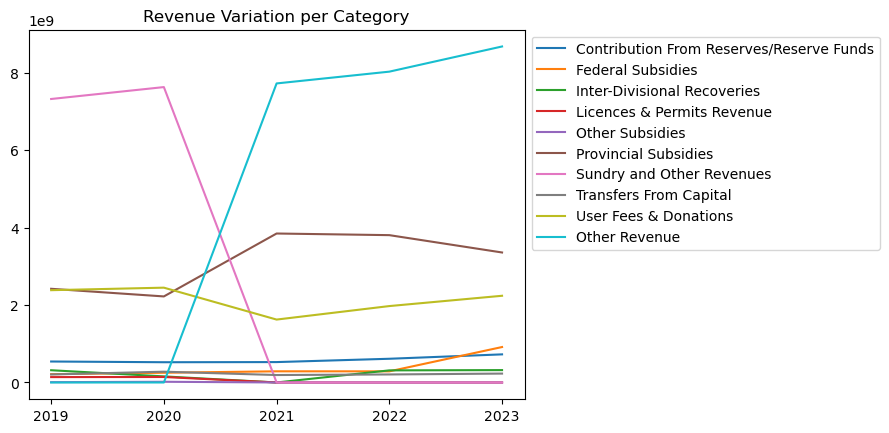

In [57]:
x_axis = ["2019", "2020", "2021", "2022", "2023" ]
y_axis_1 = rev_category_timeline_lg.iloc[1]

for i, (index, row) in enumerate(rev_category_timeline_lg.iterrows()):
        plt.plot(x_axis, rev_category_timeline_lg.iloc[i], label=index)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Revenue Variation per Category")
plt.show()

### Analysis

my analysis here


In [59]:
#Create DataFrames with summed values by Category
exp_category_2019_lg = pd.DataFrame(budget_2019_lg.groupby("Category Name")["Exp-2019"].sum().round(2))
exp_category_2020_lg = pd.DataFrame(budget_2020_lg.groupby("Category Name")["Exp-2020"].sum().round(2))
exp_category_2021_lg = pd.DataFrame(budget_2021_lg.groupby("Category Name")["Exp-2021"].sum().round(2))
exp_category_2022_lg = pd.DataFrame(budget_2022_lg.groupby("Category Name")["Exp-2022"].sum().round(2))
exp_category_2023_lg = pd.DataFrame(budget_2023_lg.groupby("Category Name")["Exp-2023"].sum().round(2))

#Create Main DataFrame with revenue by category for all 5 years
exp_category_timeline_lg = pd.merge(exp_category_2019_lg, exp_category_2020_lg, on="Category Name", how="outer")
exp_category_timeline_lg = pd.merge(exp_category_timeline_lg, exp_category_2021_lg, on="Category Name", how="outer")
exp_category_timeline_lg = pd.merge(exp_category_timeline_lg, exp_category_2022_lg, on="Category Name", how="outer")
exp_category_timeline_lg = pd.merge(exp_category_timeline_lg, exp_category_2023_lg, on="Category Name", how="outer")

#Clean on null values
exp_category_timeline_lg = exp_category_timeline_lg.fillna(0.00)
exp_category_timeline_lg = pd.DataFrame(exp_category_timeline_lg.loc[(exp_category_timeline_lg["Exp-2019"] > 0.00)|(exp_category_timeline_lg["Exp-2020"] > 0.00)|(exp_category_timeline_lg["Exp-2021"] > 0.00)|(exp_category_timeline_lg["Exp-2022"] > 0.00)|(exp_category_timeline_lg["Exp-2023"] > 0.00),:])

exp_category_timeline_lg

,Exp-2019,Exp-2020,Exp-2021,Exp-2022,Exp-2023
Category Name,,,,,
Contribution To Capital,3.434535e+08,3.434555e+08,3.495350e+08,3.477590e+08,3.454875e+08
Contribution To Reserves/Reserve Funds,1.374326e+09,1.492208e+09,1.569495e+09,6.790572e+08,8.177363e+08
Equipment,6.256912e+07,6.305564e+07,6.305676e+07,6.962870e+07,7.491960e+07
Inter-Divisional Charges,3.161485e+08,1.569948e+08,0.000000e+00,3.124781e+08,3.197343e+08
Materials & Supplies,7.350229e+08,7.344638e+08,8.132793e+08,8.103749e+08,8.393636e+08
Other Expenditures,2.778683e+09,2.699534e+09,2.923059e+09,2.864243e+09,3.151181e+09
Salaries And Benefits,6.319399e+09,6.092481e+09,0.000000e+00,0.000000e+00,0.000000e+00
Service And Rent,2.082853e+09,2.178262e+09,2.342040e+09,2.632925e+09,3.071138e+09
Benefits,0.000000e+00,0.000000e+00,1.450706e+09,1.488014e+09,1.586110e+09


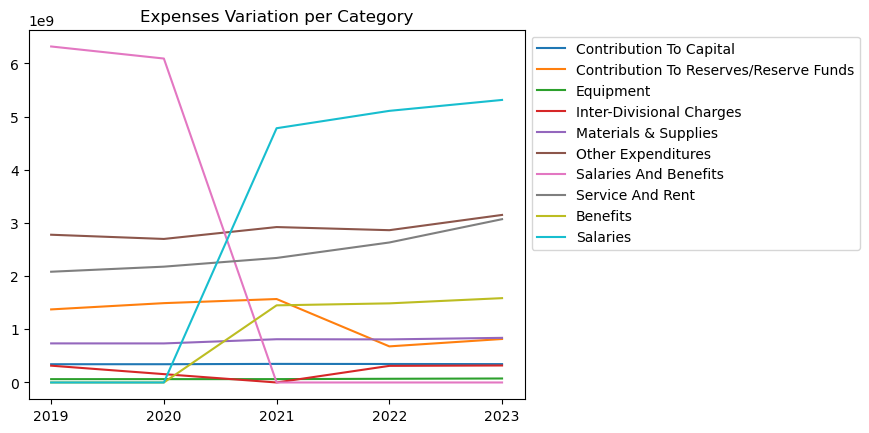

In [60]:
x_axis = ["2019", "2020", "2021", "2022", "2023" ]
y_axis_1 = exp_category_timeline_lg.iloc[1]

for i, (index, row) in enumerate(exp_category_timeline_lg.iterrows()):
        plt.plot(x_axis, exp_category_timeline_lg.iloc[i], label=index)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Expenses Variation per Category")
plt.show()

### Analysis

my analysis here